# Exploring advanced Symbol options in Magics

This notebook will help you discover lots of posibilities for plotting symbols on your maps in Magics.

**Msymbol** controls how symbols are plotted on our maps. Here we can set things like symbol type, size, colour, style, and many more things.  
List of all **msymbol** parameters you can find [in Magics documentation](https://confluence.ecmwf.int/display/MAGP/Symbol "Symbol parameters")

Magics has built in collection of meteorological symbols and all you have to do is give it WMO code. Full list of WMO codes and descriptions for present/past weather, sky cover, pressure tendency and clouds you can find [on Wikipedia](https://commons.wikimedia.org/wiki/Weather_map "Weather map symbols").  

Here are Magics names for meteorological symbols:

|marker type | names |
|---------|--------|
| present weather | ww_00,.., ww_99  |  
| past weather | W_0,.., W_9 |
| low clouds | CL_1,.., CL_9 |
| medium clouds | CM_1,.., CM_9 |
| high clouds | CH_1,.., CH_9 |
| type of cloud| C_0,.., C_9|
| total amount all clouds | N_0,.., N9 |
| atmospheric pressure tendency | a_0,.., a_9 |

Here is list of built in symbol indices:


![Magics symbol indices](https://confluence.ecmwf.int/download/attachments/14156168/symbol_marker.png)

At ECMWF  

#### From your workstation:
 
module swap (or load) Magics/new   
jupyter notebook  

load this notebook

### Import Magics and define non Symbol paramters

For start let's import Magics and define some **none symbol** parameters. We will try not to change these much in the rest of the notebook.

Both cartesian and two geographical projections are defined at the begining.

In [1]:
import Magics.macro as magics
import numpy as np

#Setting the cartesian view
cartesian_projection = magics.mmap( 
    subpage_y_position        = 2., 
    subpage_background_colour = 'black',
    subpage_map_projection    = 'cartesian',
    subpage_x_axis_type       = 'regular',
    subpage_y_axis_type       = 'regular',
    subpage_x_min             = 0.,
    subpage_x_max             = 100.,
    subpage_y_min             = 0.,
    subpage_y_max             = 100.)

#Vertical axis
vertical = magics.maxis(
    axis_orientation       = "vertical",
    axis_type              = "regular",
    axis_tick_label_height = 0.4,
    axis_tick_label_colour = 'navy',
    axis_grid              = "on",
    axis_grid_colour       = "white",
    axis_grid_thickness    = 1,
    axis_grid_line_style   = "dot")

#Horizontal axis
horizontal = magics.maxis(
    axis_orientation       = "horizontal",
    axis_type              = "regular",
    axis_minor_tick        = "on",
    axis_grid              = "on",
    axis_tick_label_height = 0.4,
    axis_grid_colour       = "grey",
    axis_grid_thickness    = 1,
    axis_grid_line_style   = "dot")

#Geographical projection
central_europe = magics.mmap(
    superpage_background_colour = 'black',
    subpage_map_library_area    = "on",
    subpage_map_area_name       = "central_europe"
)

#Geographical projection
north_america = magics.mmap(
    subpage_upper_right_longitude  = -15.00,
    subpage_upper_right_latitude   = 30.00,
    subpage_lower_left_latitude    = -5.00,
    subpage_map_vertical_longitude = -100.00,
    subpage_lower_left_longitude   = -140.00,
    subpage_map_projection         = "polar_stereographic")


#Coastlines
coast = magics.mcoast(    
    map_coastline_colour            = "RGB(0.8,0.8,0.8,0.5)",
    map_coastline_resolution        = "medium",
    map_coastline_thickness         = 1,
    map_coastline_land_shade        = "on",
    map_coastline_land_shade_colour = "RGB(0.25,0.25,0.25)",
    map_coastline_sea_shade         = "on",
    map_coastline_sea_shade_colour  = "black",
    map_grid_line_style             = "dash",
    map_label_height                = 0.35,
    map_grid_colour                 = "RGB(0.8,0.8,0.8,0.5)")

#Legend
legend = magics.mlegend(legend_display_type       = "continuous")

# Different meteorological parameters we will plot in this notebook
WW    = magics.mgeo(geo_input_file_name = "WW.gpt")       # Present weather 
airep = magics.mgeo(geo_input_file_name = "airep.geo")    # Observed temperature from aircrafts
tcc   = magics.mgeo(geo_input_file_name = "tcc.gpt")      # Total cloud amount

### Plotting Present weather symbols on a map

To plot different meteorological symbols for present weather and colour them accordingly we are using the **advanced table mode**.

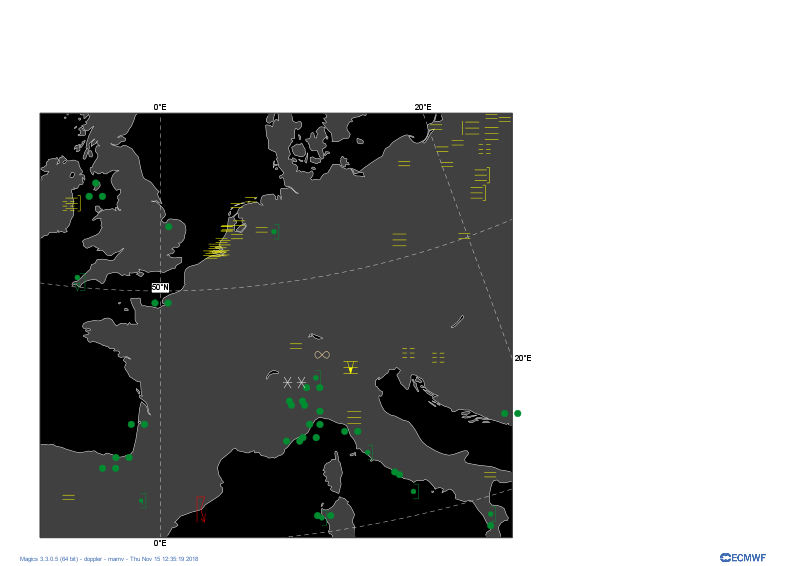

In [2]:
colour_list = ["none", "none", "none", "none", "cream", "cream", "cream", "cream", 
               "cream", "cream","yellow", "yellow", "yellow", "red", "kelly_green", 
               "kelly_green", "kelly_green", "red", "red", "red", "kelly_green", 
               "kelly_green", "white", "white", "red", "kelly_green", "white", 
               "red", "yellow", "red", "cream", "cream", "cream", "cream", "cream", 
               "cream", "white", "white", "white", "white", "yellow", "yellow", 
               "yellow", "yellow", "yellow", "yellow", "yellow", "yellow", "yellow", 
               "yellow", "kelly_green", "kelly_green", "kelly_green", "kelly_green", 
               "kelly_green", "kelly_green", "red", "red", "kelly_green", 
               "kelly_green", "kelly_green", "kelly_green", "kelly_green", 
               "kelly_green", "kelly_green", "kelly_green", "red", "red", "white", 
               "white", "white", "white","white", "white", "white", "white", "red", 
               "red", "red", "orange", "kelly_green", "kelly_green", "kelly_green", 
               "white", "white","white", "white", "red", "red", "red", "red", "red", 
               "red", "red", "red", "red", "red", "red", "red", "red"]

level_list = [0.,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,
              25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,
              47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,
              69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,
              91,92,93,94,95,96,97,98,99]

symb_name_list = ['ww_00', 'ww_01', 'ww_02', 'ww_03', 'ww_04', 'ww_05', 'ww_06', 'ww_07', 
                  'ww_08', 'ww_09', 'ww_10', 'ww_11', 'ww_12', 'ww_13', 'ww_14', 'ww_15', 
                  'ww_16', 'ww_17', 'ww_18', 'ww_19', 'ww_20', 'ww_21', 'ww_22', 'ww_23', 
                  'ww_24', 'ww_25', 'ww_26', 'ww_27', 'ww_28', 'ww_29', 'ww_30', 'ww_31', 
                  'ww_32', 'ww_33', 'ww_34', 'ww_35', 'ww_36', 'ww_37', 'ww_38', 'ww_39', 
                  'ww_40', 'ww_41', 'ww_42', 'ww_43', 'ww_44', 'ww_45', 'ww_46', 'ww_47', 
                  'ww_48', 'ww_49', 'ww_50', 'ww_51', 'ww_52', 'ww_53', 'ww_54', 'ww_55', 
                  'ww_56', 'ww_57', 'ww_58', 'ww_59', 'ww_60', 'ww_61', 'ww_62', 'ww_63', 
                  'ww_64', 'ww_65', 'ww_66', 'ww_67', 'ww_68', 'ww_69', 'ww_70', 'ww_71', 
                  'ww_72', 'ww_73', 'ww_74', 'ww_75', 'ww_76', 'ww_77', 'ww_78', 'ww_79', 
                  'ww_80', 'ww_81', 'ww_82', 'ww_83', 'ww_84', 'ww_85', 'ww_86', 'ww_87', 
                  'ww_88', 'ww_89', 'ww_90', 'ww_91', 'ww_92', 'ww_93', 'ww_94', 'ww_95', 
                  'ww_96', 'ww_97', 'ww_98', 'ww_99']

symbol_plotting = magics.msymb(
    symbol_advanced_table_colour_method    = "list",
    symbol_advanced_table_height_method    = "calculate",
    symbol_advanced_table_height_min_value = 1.,
    symbol_advanced_table_height_max_value = 2.,
    symbol_type                            = "marker",
    symbol_table_mode                      = "advanced",
    symbol_marker_mode                     = "name",
    symbol_advanced_table_selection_type   = "list",
    symbol_advanced_table_colour_list      = colour_list,
    symbol_advanced_table_level_list       = level_list,
    symbol_advanced_table_marker_name_list = symb_name_list)


magics.plot(central_europe, coast, WW, symbol_plotting)

### Plotting Present weather symbols in cartesian projection

Let's see what built in meteorological symbols look like on a graph. Here we are using the same symbol_plotting definition as in previous cell.

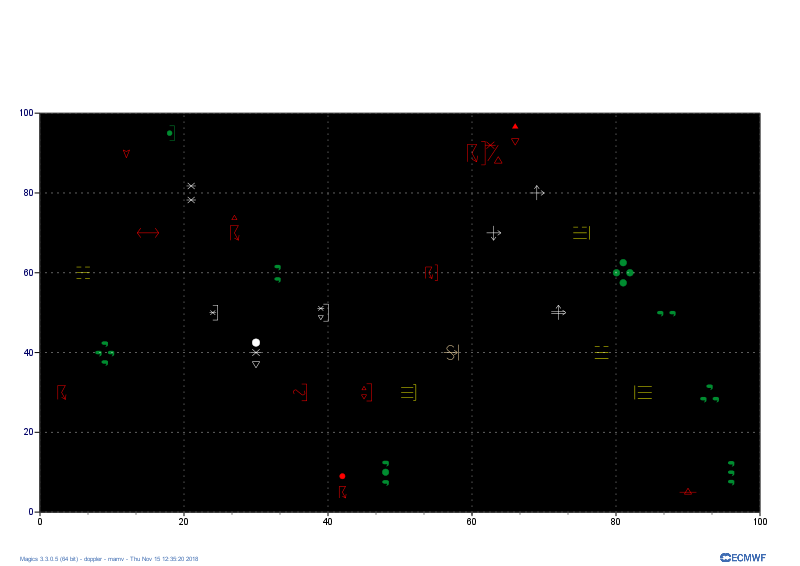

In [3]:
x = [3.,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99]

values = [17.,41,55,18,76,21,72,22,96,83,52,24,26,95,27,59,28,
          29,30,93,36,89,38,39,42,44,65,47,51,77,53,54,19,57]

y = [30.,60,40,90,70,95,80,50,70,40,60,30,50,5,30,10,30.,60,40,90,70,95,80,50,70,40,60,30,50,5,30,10]

input = magics.minput(
    input_x_values = x,
    input_y_values = y,
    input_values   = values)

magics.plot(cartesian_projection, vertical, horizontal, input, symbol_plotting)

### Total cloud amount symbols on geographical map

Let's see how we can plot total amount of clouds. We have this information stored in geopoints file, which is just an ascii file with a little header.

In order to plot different symbols on a map we need to use **advanced table mode**. In this mode we can control markers' shape, colour, size etc.

Also notice, that symbols can have a legend too.

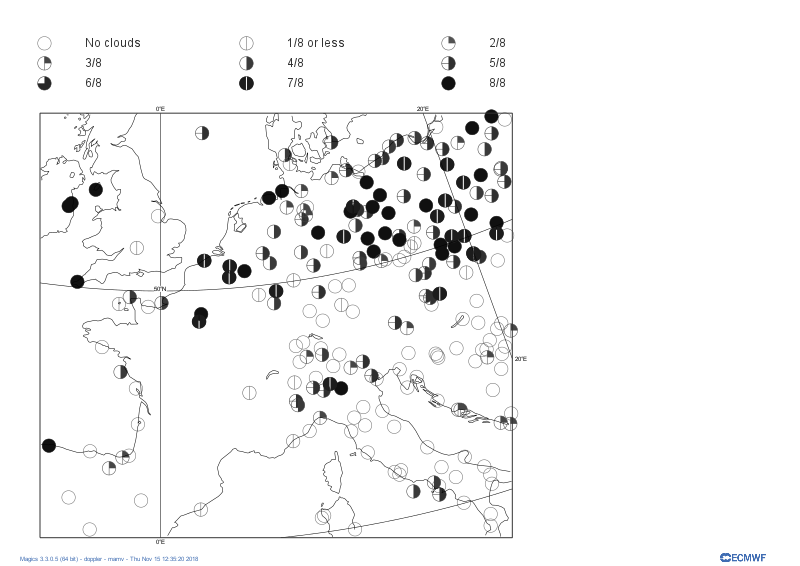

In [4]:
tcc_symb = magics.msymb(    
    symbol_advanced_table_height_method    = "calculate",
    symbol_advanced_table_height_min_value = 1.,
    symbol_advanced_table_height_max_value = 1.,
    symbol_type                            = "marker",
    legend = "on",
    symbol_table_mode                      = "advanced",
    symbol_marker_mode                     = "name",
    symbol_advanced_table_selection_type   = "list",
    symbol_advanced_table_colour_method    = "list",
    symbol_advanced_table_colour_list      = ['#696969','#5c5c5c','#525252','#464646','#3a3a3a',
                                              '#303030','#262626','#1c1c1c','#101010','#000000'],
    symbol_advanced_table_level_list       = [0.0,0.1,12.5,25,37.5,50.0,62.5,75.0,87.5,100],
    symbol_advanced_table_marker_name_list = ['N_0','N_1','N_2','N_3','N_4',
                                              'N_5','N_6','N_7','N_8','N_9'])

symb_legend = magics.mlegend(
    legend_user_lines =  ["No clouds","1/8 or less", "2/8", "3/8", "4/8", "5/8", "6/8", "7/8", "8/8"],
    legend_box_mode = "positional",
    legend_text_composition = "user_text_only",
    legend_text_colour = "charcoal",   
    legend_text_font_size = 0.5,
    legend_column_count = 3,
    legend_box_y_position = 17.,
    legend_box_x_position = -1.1,
    legend_box_x_length = 25.00,
    legend_box_y_length = 3.30)

magics.plot(central_europe, tcc, tcc_symb, magics.mcoast(), symb_legend)

### Plotting observational data from aircrafts

**airep.geo** file contains observational AIREP data from aircrafts. Here we are using the same symbol for all the points but change their colour and size with temperature. Notice that we can use continuous legend with symbols too, which is nice when we plot all the same symbols.

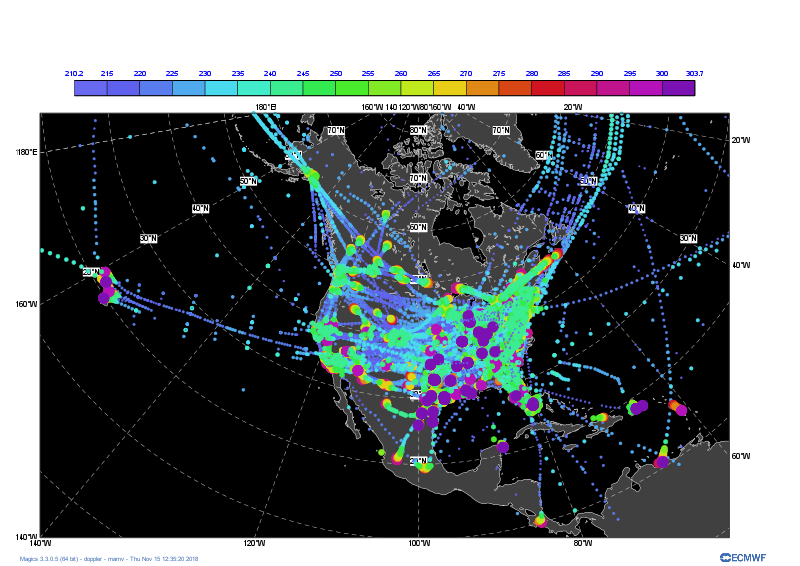

In [5]:
airep_symbol = magics.msymb( 
    legend                                 = "on",
    symbol_type                            = "marker",
    symbol_table_mode                      = "advanced",
    symbol_advanced_table_selection_type   = "interval",
    symbol_advanced_table_interval         = 5.,
    symbol_advanced_table_min_level_colour = "lavender",
    symbol_advanced_table_max_level_colour = "violet",
    symbol_advanced_table_colour_direction = "clockwise",
    symbol_advanced_table_height_method    = "calculate",
    symbol_advanced_table_height_min_value = 0.1,
    symbol_advanced_table_height_max_value = 0.8,    
    symbol_marker_index                    =  15 )

magics.plot(north_america, coast, airep, airep_symbol, legend)